Notebook to extract data from fprints to the log.txt file in Atlantis

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
folder_name = "7a-EquationsPaper-90d-noFHEuptake"
with open("/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/"+folder_name +"/log.txt", "r") as file:
    row_text = file.readlines()

In [28]:
def extract_line_data(filename, pattern):
    # First condition: keep rows with pattern
    contaminant_row_data = [line for line in row_text if re.search(pattern, line)]

    # Function to extract the desired words from each line
    def extract_word(line, position):
        words = line.split()
        return words[position - 1] if len(words) >= position else None

    # Extract data into lists
    time = [float(extract_word(line, 2)) for line in contaminant_row_data]
    group = [extract_word(line, 4) for line in contaminant_row_data]
    cGroupLevel = [float(extract_word(line, 7)) for line in contaminant_row_data]
    effect = [float(extract_word(line, 9)) for line in contaminant_row_data]

    # Create a pandas DataFrame
    contaminant_effect = pd.DataFrame({
        'Time': time,
        'Group': group,
        'cGroupLevel': cGroupLevel,
        'Effect': effect
    })

    # Plotting the data (optional, requires matplotlib)
    plt.scatter(contaminant_effect['cGroupLevel'], contaminant_effect['Effect'])
    plt.xlabel('cGroupLevel')
    plt.ylabel('Effect')
    plt.title(pattern)
    plt.show()

    # Save the data to a CSV file
    contaminant_effect.to_csv(filename+".csv", index=False)

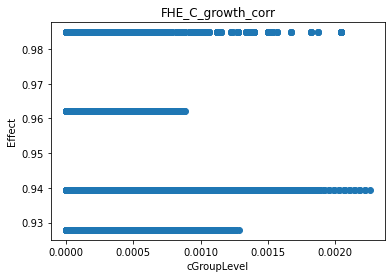

In [29]:
filename = "FHE-kgrowth"
pattern = 'FHE_C_growth_corr'
extract_line_data(filename, pattern)

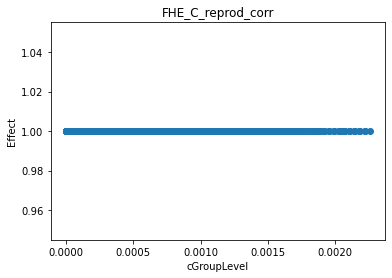

In [30]:
filename = "FHE-kreprod"
pattern = 'FHE_C_reprod_corr'
extract_line_data(filename, pattern)

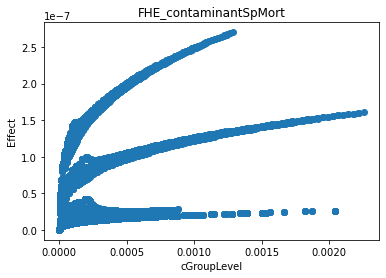

In [31]:
filename = "FHE-Mcontam"
pattern = 'FHE_contaminantSpMort'
extract_line_data(filename, pattern)

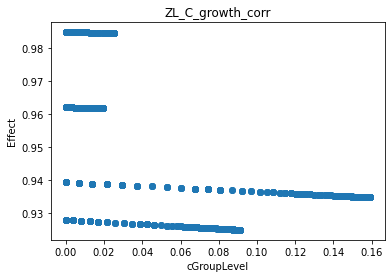

In [32]:
filename = "ZL-kgrowth"
pattern = 'ZL_C_growth_corr'
extract_line_data(filename, pattern)


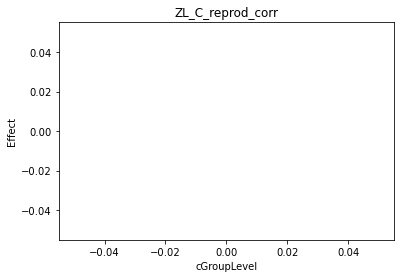

In [33]:
filename = "ZL-kreprod"
pattern = 'ZL_C_reprod_corr'
extract_line_data(filename, pattern)

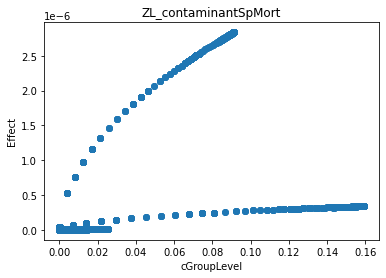

In [34]:
filename = "ZL-Mcontam"
pattern = 'ZL_contaminantSpMort'
extract_line_data(filename, pattern)

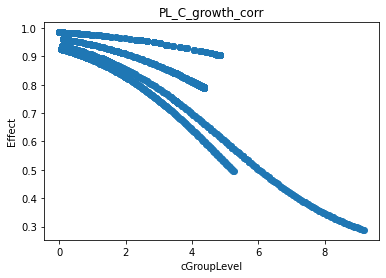

In [35]:
filename = "PL-kgrowth"
pattern = 'PL_C_growth_corr'
extract_line_data(filename, pattern)

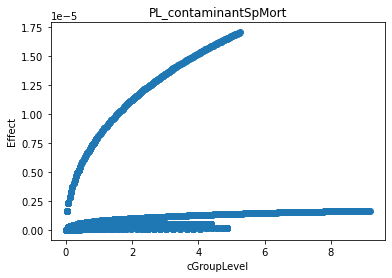

In [36]:
filename = "PL-Mcontam"
pattern = 'PL_contaminantSpMort'
extract_line_data(filename, pattern)